In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import os
import time
import random
import warnings
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

In [2]:
def print_frequency(y_train,y_test,kind='Validation'):
    unique, counts = np.unique(y_train, return_counts=True)
    uniquet, countst = np.unique(y_test, return_counts=True)

    fig, ax = plt.subplots()
    rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
    rects2 = ax.bar(unique + 0.2, countst, 0.25, label=kind)
    ax.legend()
    ax.set_xticks(unique)
    ax.set_xticklabels(labels)

    plt.title('Fashion MNIST classes')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


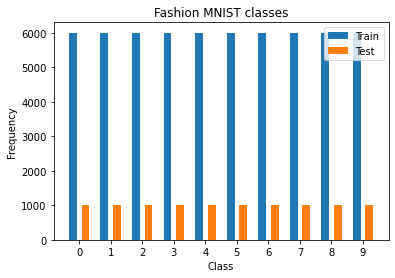

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

sprite = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

labels = ["%s" % i for i in range(10)]

print_frequency(y_train,y_test,kind='Test')

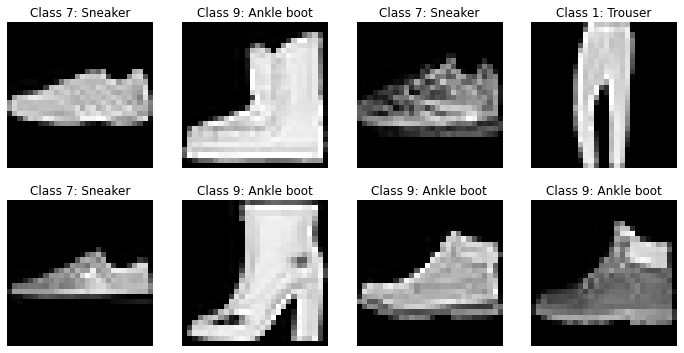

In [4]:
fig, ax = plt.subplots(2, 4, figsize = (12, 6))
ran = random.randrange(100)

for i in range(8):
    ax[i//4, i%4].imshow(x_train[i+ran], cmap='gray')
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title("Class %d: %s" 
                            %(y_train[i+ran],sprite[y_train[i+ran]]))
    
plt.show()


In [5]:
normalizer = np.amax(x_train).astype('float32')

x_train = (x_train/normalizer).astype('float32')
x_test = (x_train/normalizer).astype('float32')

x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(60000,28*28))

print("X_train: Max = ",np.amax(x_train)," Min = ",np.amin(x_train))
print("X_test: Max = ",np.amax(x_test)," Min = ",np.amin(x_test))

print(x_train.shape)
print(x_test.shape)

X_train: Max =  1.0  Min =  0.0
X_test: Max =  0.003921569  Min =  0.0
(60000, 784)
(60000, 784)


## 1. Preparacao do dataset

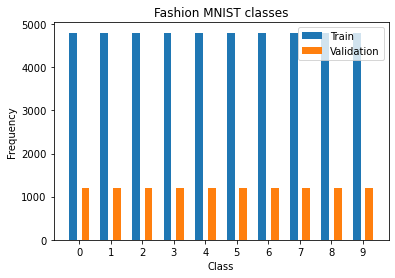

In [6]:
N, d = x_train.shape
index = np.arange(N)

x_Dtrain,x_Dval,y_Dtrain,y_Dval,index_Dtrain,index_Dval = \
train_test_split(x_train,y_train,index,train_size=0.80,random_state=4,stratify=y_train)

print_frequency(y_Dtrain,y_Dval)

## 2. Choosing a baseline

### 2.1. Logistic Regression

In [10]:
#Logistic Regression

model_lgreg = LogisticRegression()
solvers_lgreg = ['newton-cg']
c_values_lgreg = [1.0] 
grid_lgreg = dict(solver=solvers_lgreg,C=c_values_lgreg,random_state=[4])

time_lgreg = time.time()
grid_search_lgreg = GridSearchCV(estimator=model_lgreg, param_grid=grid_lgreg, scoring='accuracy',verbose=2, 
            cv=skl.model_selection.StratifiedKFold(n_splits=2,random_state=4,shuffle=True).split(x_Dtrain,y_Dtrain))
grid_result_lgreg = grid_search_lgreg.fit(x_Dtrain, y_Dtrain) 

time_lgreg = time.time() - time_lgreg

pd.DataFrame(grid_result_lgreg.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['rank_test_score'])

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ............C=1.0, random_state=4, solver=newton-cg; total time= 3.9min
[CV] END ............C=1.0, random_state=4, solver=newton-cg; total time= 3.6min


,params,rank_test_score,mean_test_score
0,"{'C': 1.0, 'random_state': 4, 'solver': 'newto...",1,0.843417
